<h1 align = "center"> Housing Prices EDA and Predictions </h1>

<h3 align = "center"> Task 3 - EDA </h3>

In [3]:
# creating output folder to store generated reports

import os

os.makedirs("output", exist_ok = True)

In [4]:
# Read & Load Data file

import pandas as pd

housing_df = pd.read_csv("data/kc_house_data_classification.csv")
housing_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [5]:
housing_df.shape

(21613, 19)

In [6]:
housing_df.tail()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0
21612,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,0


In [7]:
# Data types

housing_df.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price_gt_1M        int64
dtype: object

In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [9]:
housing_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01
sqft_above,21613.0,1788.390691,828.090978,290.0000,1190.000,1560.0000,2210.000,9.410000e+03


In [10]:
# !pip install sweetviz

In [11]:
# Automated EDA sweetviz

import sweetviz as sv

# SweetViz report
eda_report = sv.analyze(housing_df)
eda_report.show_html("output/housing_EDA_report_sweetviz.html")

print("EDA report created successful !!! ")


                                             |                                             | [  0%]   00:00 ->…

Report output/housing_EDA_report_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
EDA report created successful !!! 


In [12]:
# !pip install ydata-profiling

In [13]:
# !pip install --upgrade typing_extensions

In [14]:
# Automated EDA pandas-profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(housing_df, title = "Pandas Profiling Report", explorative = True)
profile.to_file("output/pandas_profiling_report.html")

print("Report created successful !!! ")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 32.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Report created successful !!! 


<h3 align = "center"> Task 4 - Categorize feature types </h3>

In [85]:
# partitioning housing_df into train and test data sets

X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

In [86]:
# converting selected columns to categorical Type

# List of categorical variables
categorical_vars = ['waterfront', 'view', 'condition', 'zipcode']

numeric_vars = [col for col in X.columns if col not in categorical_vars]

print(numeric_vars)


for col in categorical_vars:
    housing_df[col] = housing_df[col].astype('category')


housing_df.dtypes

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
price_gt_1M         int64
dtype: object

In [87]:
from sklearn.model_selection import train_test_split

# Use instructor-specified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=73
)

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17290 entries, 13067 to 21398
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       17290 non-null  int64   
 1   bathrooms      17290 non-null  float64 
 2   sqft_living    17290 non-null  int64   
 3   sqft_lot       17290 non-null  int64   
 4   floors         17290 non-null  float64 
 5   waterfront     17290 non-null  category
 6   view           17290 non-null  category
 7   condition      17290 non-null  category
 8   grade          17290 non-null  int64   
 9   sqft_above     17290 non-null  int64   
 10  sqft_basement  17290 non-null  int64   
 11  yr_built       17290 non-null  int64   
 12  yr_renovated   17290 non-null  int64   
 13  zipcode        17290 non-null  category
 14  lat            17290 non-null  float64 
 15  long           17290 non-null  float64 
 16  sqft_living15  17290 non-null  int64   
 17  sqft_lot15     17290 non-null  i

In [89]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13067,3,2.25,1670,7881,1.0,0,0,4,7,1190,480,1977,0,98031,47.4105,-122.180,1870,7820
17417,5,2.75,3100,5298,2.0,0,0,3,7,3100,0,2007,0,98065,47.5369,-121.887,2440,5250
1290,3,2.25,2470,10290,2.0,0,0,3,8,2230,240,1984,0,98058,47.4459,-122.124,1970,10150
13137,3,1.75,2610,117176,1.0,0,0,3,7,1390,1220,1981,0,98022,47.2585,-121.925,2140,142005
15815,3,1.75,1400,18002,1.0,0,0,3,6,1400,0,1977,0,98019,47.7250,-121.967,2240,14068


In [90]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
9626,3,1.00,980,9682,1.0,0,0,3,7,980,0,1969,0,98031,47.4136,-122.207,1580,9682
21376,3,2.25,1310,915,2.0,0,0,3,7,1060,250,2007,0,98144,47.5738,-122.293,1500,1215
9036,3,2.75,2216,31215,1.0,0,0,3,9,2216,0,1968,2005,98092,47.3164,-122.199,2216,30048
1007,4,2.50,2610,7091,2.0,0,0,3,9,2610,0,1987,0,98023,47.3017,-122.349,2610,7773


In [91]:
y_train.head()

13067    0
17417    0
1290     0
13137    0
15815    0
Name: price_gt_1M, dtype: int64

In [92]:
y_test.head()

13473    0
9626     0
21376    0
9036     0
1007     0
Name: price_gt_1M, dtype: int64

<h3 align = "center"> Task 5 - Logistic regression models </h3>

<h4 align = "center"> Null Model or Model 0 </h4>

Null Model - Train Accuracy: 0.933
Null Model - Test Accuracy: 0.924


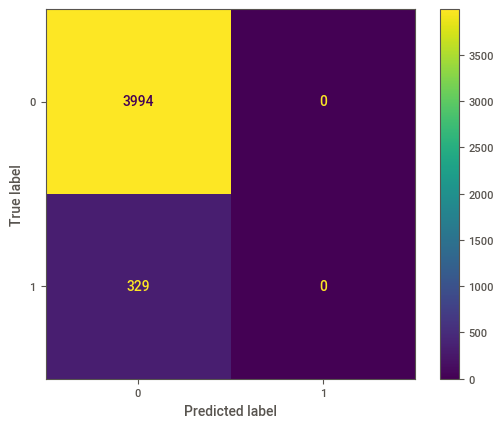

In [95]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Null model
null_model = DummyClassifier(strategy = 'most_frequent')
null_model.fit(X_train, y_train)

# Predictions
y_train_null = null_model.predict(X_train)
y_test_null = null_model.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_null)
test_acc = accuracy_score(y_test, y_test_null)

print(f"Null Model - Train Accuracy: {train_acc:.3f}")
print(f"Null Model - Test Accuracy: {test_acc:.3f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(null_model, X_test, y_test)

<h5> The null model always predicts that a house is priced under 1 million, which gives it a high test accuracy of 92.4%. However, it completely fails to identify any houses over 1 million (329 missed). This shows that even though the accuracy looks decent, the model is not useful because it ignores one entire class. </h5>

<h4 align = "center"> Preprocessor </h4>

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_vars),
        ('cat', categorical_transformer, categorical_vars)])

<h4 align = "center"> Define Pipeline's for Model's 1 - 4 </h4>

<h5 align = "center">  Model 1: Ridge Logistic Regression (C = 1.0) </h5>

In [100]:
ridge_model = Pipeline([
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(penalty = 'l2', C = 1.0, solver = 'saga', max_iter = 2000))
])

<h5 align = "center">  Model 2: Lasso Logistic Regression (C = 1.0) </h5>

In [102]:
lasso_model = Pipeline([
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(penalty='l1', C = 1.0, solver = 'saga', max_iter = 2000))
])


<h5 align = "center">  Model 3: Lasso Logistic Regression (C = 0.01) </h5>

In [133]:
lasso_strong_model = Pipeline([
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(penalty='l1', C = 0.01, solver = 'saga', max_iter = 5000))
])

<h5 align = "center">  Model 4: Lasso with Cross-Validation </h5>

In [135]:
from sklearn.linear_model import LogisticRegressionCV

lasso_cv_model = Pipeline([
    ('preprocess', preprocessor),
    ('logreg', LogisticRegressionCV(penalty='l1', solver = 'saga', max_iter = 5000, cv = 5))
])

<h4 align = "center"> Fit Model for Model's 1 - 4 </h4>

<h5 align = "center">  Model 1: Ridge Logistic Regression (C = 1.0) </h5>

Model 1 - Ridge Logistic Regression
Training Score: 0.973
Test Score: 0.971


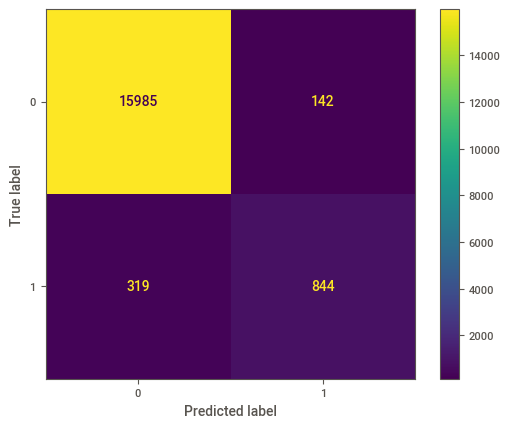

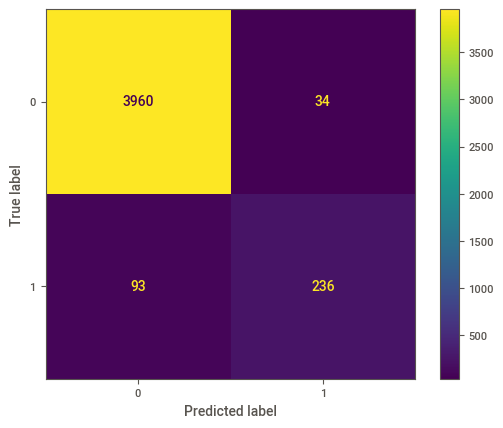

In [138]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Fit model
ridge_model.fit(X_train, y_train)

# Accuracy scores
print(f"Model 1 - Ridge Logistic Regression")
print(f"Training Score: {ridge_model.score(X_train, y_train):.3f}")
print(f"Test Score: {ridge_model.score(X_test, y_test):.3f}")

# Confusion matrices
ConfusionMatrixDisplay.from_estimator(ridge_model, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(ridge_model, X_test, y_test)

<h5> Model 1, which uses Ridge Logistic Regression, gave a high training accuracy of 97.3% and a test accuracy of 97.1%, showing that the model performs well and is not overfitting. The confusion matrices show that it correctly predicts most houses, especially those priced under 1 million. It has done a good job identifying houses over $1 million though it still misses a few. Overall, the model performs much better than the baseline (null model). </h5>

<h5 align = "center">  Model 2: Lasso Logistic Regression (C = 1.0) </h5>


Model 2 - Lasso Logistic Regression (C = 1.0)
Training Score: 0.974
Test Score: 0.970


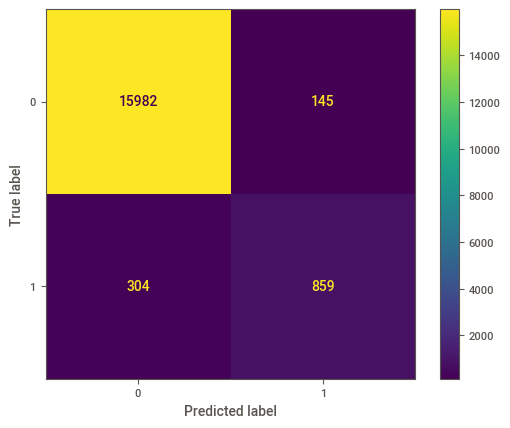

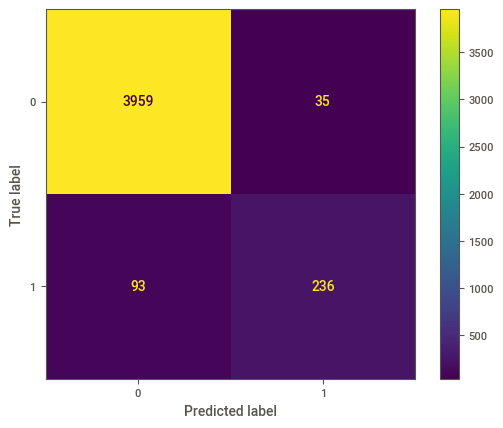

In [140]:
# Fit model
lasso_model.fit(X_train, y_train)

# Accuracy scores
print(f"\nModel 2 - Lasso Logistic Regression (C = 1.0)")
print(f"Training Score: {lasso_model.score(X_train, y_train):.3f}")
print(f"Test Score: {lasso_model.score(X_test, y_test):.3f}")

# Confusion matrices
ConfusionMatrixDisplay.from_estimator(lasso_model, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(lasso_model, X_test, y_test)

<h5>  Model 2 performed very similarly to the Ridge model, with a training accuracy of 97.4% and test accuracy of 97.0%. The confusion matrices show that it correctly classified most houses, including many over $1 million. Lasso also helps reduce the impact of less important features by pushing some coefficients to zero, which can make the model simpler and more interpretable. Overall, it performed slightly better than the null model and nearly the same as Ridge.</h5>

<h5 align = "center">  Model 3: Lasso Logistic Regression (C = 0.01) </h5>

C:\Users\uttar\anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Model 3 - Lasso Logistic Regression (C = 0.01)
Training Score: 0.957
Test Score: 0.955


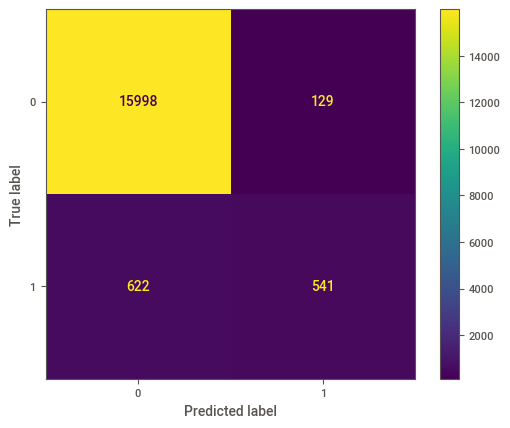

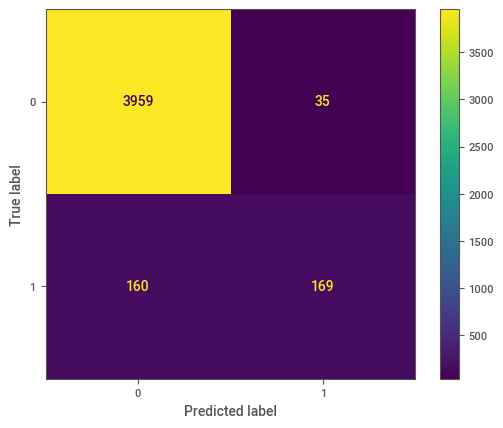

In [142]:
# Fit model
lasso_strong_model.fit(X_train, y_train)

# Accuracy scores
print(f"\nModel 3 - Lasso Logistic Regression (C = 0.01)")
print(f"Training Score: {lasso_strong_model.score(X_train, y_train):.3f}")
print(f"Test Score: {lasso_strong_model.score(X_test, y_test):.3f}")

# Confusion matrices
ConfusionMatrixDisplay.from_estimator(lasso_strong_model, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(lasso_strong_model, X_test, y_test)

<h5>  Model 3 had slightly lower performance than the previous models, with a training accuracy of 95.7% and test accuracy of 95.5%. Since the C value is smaller, it applies stronger regularization, which pushes more coefficients to zero. This helps simplify the model but can reduce accuracy, especially for predicting houses over $1 million. As shown in the confusion matrix, the model missed more high-value homes (160 false negatives), suggesting that too much regularization may hurt its ability to detect the minority class. </h5>

<h5 align = "center">  Model 4: Lasso with Cross-Validation </h5>


Model 4 - LassoCV Logistic Regression
Training Score: 0.975
Test Score: 0.972
Optimal C value from CV: 10000.0


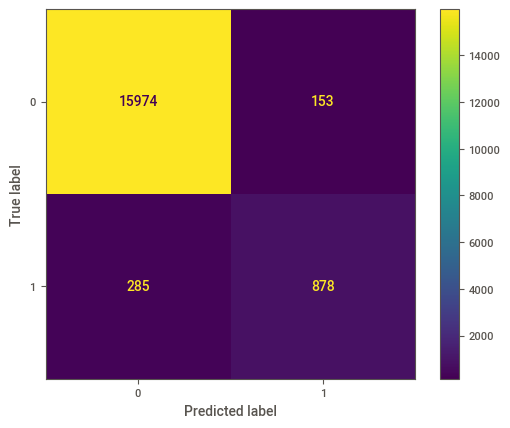

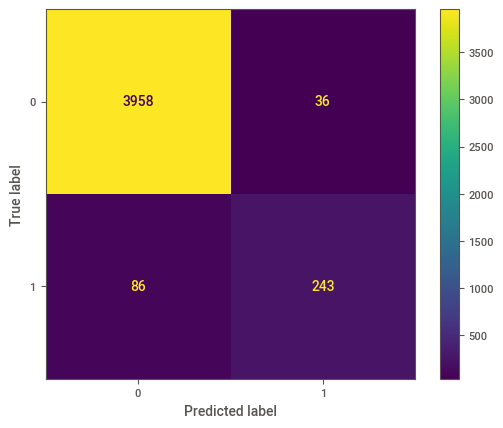

In [144]:
# Fit model
lasso_cv_model.fit(X_train, y_train)

# Accuracy scores
print(f"\nModel 4 - LassoCV Logistic Regression")
print(f"Training Score: {lasso_cv_model.score(X_train, y_train):.3f}")
print(f"Test Score: {lasso_cv_model.score(X_test, y_test):.3f}")
print("Optimal C value from CV:", lasso_cv_model.named_steps['logreg'].C_[0])

# Confusion matrices
ConfusionMatrixDisplay.from_estimator(lasso_cv_model, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(lasso_cv_model, X_test, y_test)

<h5> Model 4 used cross-validation to find the best regularization strength and achieved strong results, with a training accuracy of 97.5% and test accuracy of 97.2%. The confusion matrices show that it balanced both classes well, with the fewest false negatives (86) among all models - meaning it did the best job identifying homes over $1 million. This model benefited from automatic tuning of C, which helped it avoid overfitting or underfitting. Overall, it performed the best. </h5>

<h5 align = "center">  Plotting Co-efficients </h5>

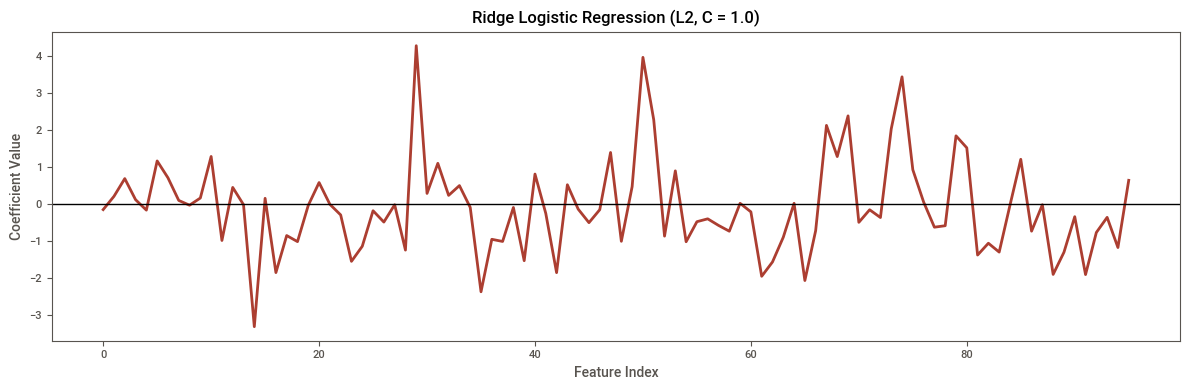

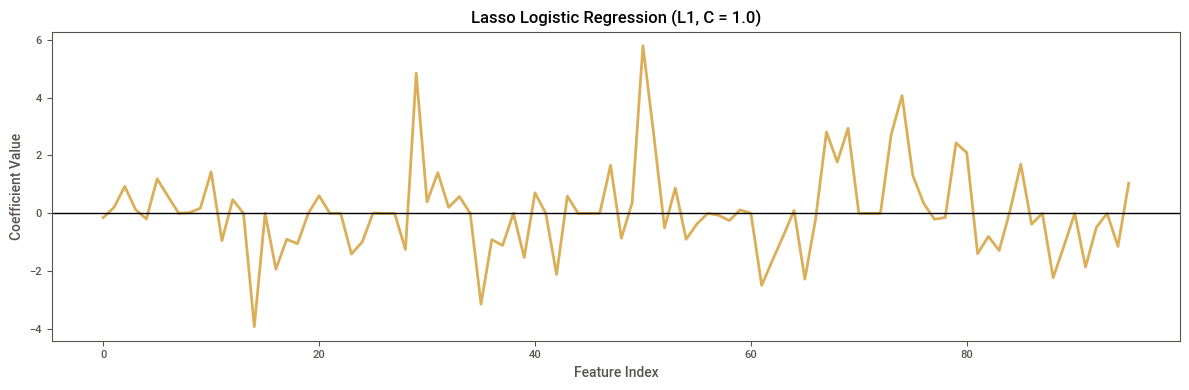

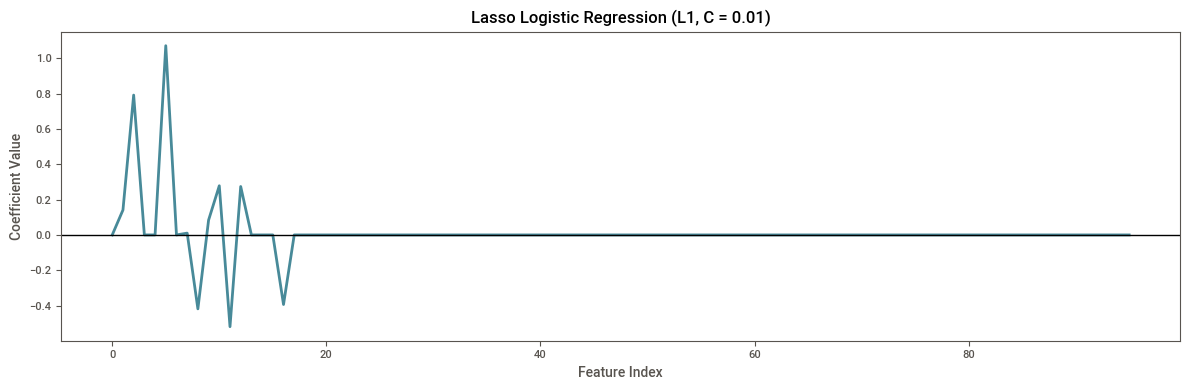

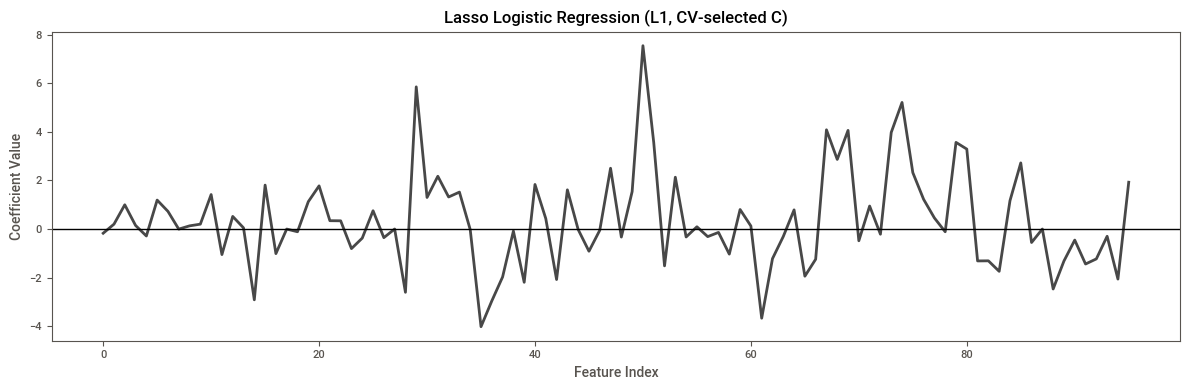

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Extract coefficients
coef_ridge = ridge_model.named_steps['logreg'].coef_[0]
coef_lasso_1 = lasso_model.named_steps['logreg'].coef_[0]
coef_lasso_001 = lasso_strong_model.named_steps['logreg'].coef_[0]
coef_lasso_cv = lasso_cv_model.named_steps['logreg'].coef_[0]

# Plot Ridge
plt.figure(figsize = (12, 4))
plt.plot(coef_ridge, color = '#AC3E31', linewidth = 2)
plt.axhline(0, color = 'black', linewidth = 1)
plt.title('Ridge Logistic Regression (L2, C = 1.0)')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Plot Lasso (C = 1.0)
plt.figure(figsize = (12, 4))
plt.plot(coef_lasso_1, color = '#DBAE58', linewidth = 2)
plt.axhline(0, color = 'black', linewidth = 1)
plt.title('Lasso Logistic Regression (L1, C = 1.0)')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Plot Lasso (C = 0.01)
plt.figure(figsize = (12, 4))
plt.plot(coef_lasso_001, color = '#488A99', linewidth = 2)
plt.axhline(0, color = 'black', linewidth = 1)
plt.title('Lasso Logistic Regression (L1, C = 0.01)')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Plot LassoCV
plt.figure(figsize = (12, 4))
plt.plot(coef_lasso_cv, color = '#484848', linewidth = 2)
plt.axhline(0, color = 'black', linewidth = 1)
plt.title('Lasso Logistic Regression (L1, CV-selected C)')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()


### Coefficient Plots Interpretation
- **The Ridge model (L2)** keeps all coefficients nonzero and evenly shrunk. 
- **The Lasso model (L1, C = 1.0)** shows more sparsity, zeroing out some features. 
- **With stronger regularization (C = 0.01)**, Lasso aggressively pushes almost all coefficients to zero, which can oversimplify the model. 
- **The LassoCV model**, which automatically selects the best C, strikes a balance by zeroing out less useful features while keeping stronger signals. 

<h5 align = "center">  Task 6 - Simple Decision Tree Classifier </h5>

In [197]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Create pipeline with preprocessing and decision tree
tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=73, max_depth = None))  
])


In [198]:
# Fit the model
tree_model.fit(X_train, y_train)

# Accuracy
train_score = tree_model.score(X_train, y_train)
test_score = tree_model.score(X_test, y_test)

print(f"Decision Tree - Training Accuracy: {train_score:.3f}")
print(f"Decision Tree - Test Accuracy: {test_score:.3f}")


Decision Tree - Training Accuracy: 1.000
Decision Tree - Test Accuracy: 0.961


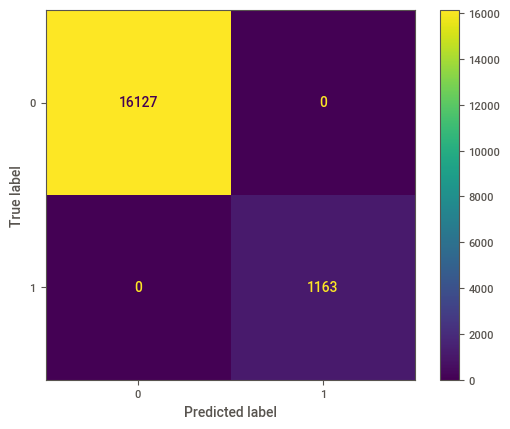

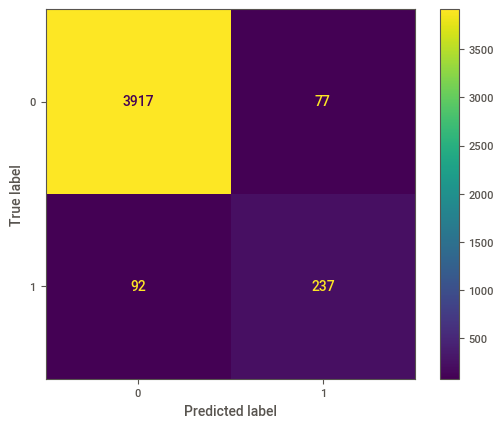

In [199]:
from sklearn.metrics import ConfusionMatrixDisplay

# Training set confusion matrix
ConfusionMatrixDisplay.from_estimator(tree_model, X_train, y_train)

# Test set confusion matrix
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)

<h5> The decision tree model achieved perfect training accuracy (100%) and a test accuracy of 96.1%. This shows that the tree completely memorized the training data - a classic sign of overfitting. In the test set, performance dropped slightly, with 92 high-value homes misclassified. While the accuracy is still good, it's clear the model may not generalize as well as the regularized logistic regression models. Decision trees don’t use coefficients like logistic regression. Instead, they split data based on feature thresholds, so a coefficient plot doesn't apply.  </h5>

<h5 align = "center">  Tree Structure </h5>

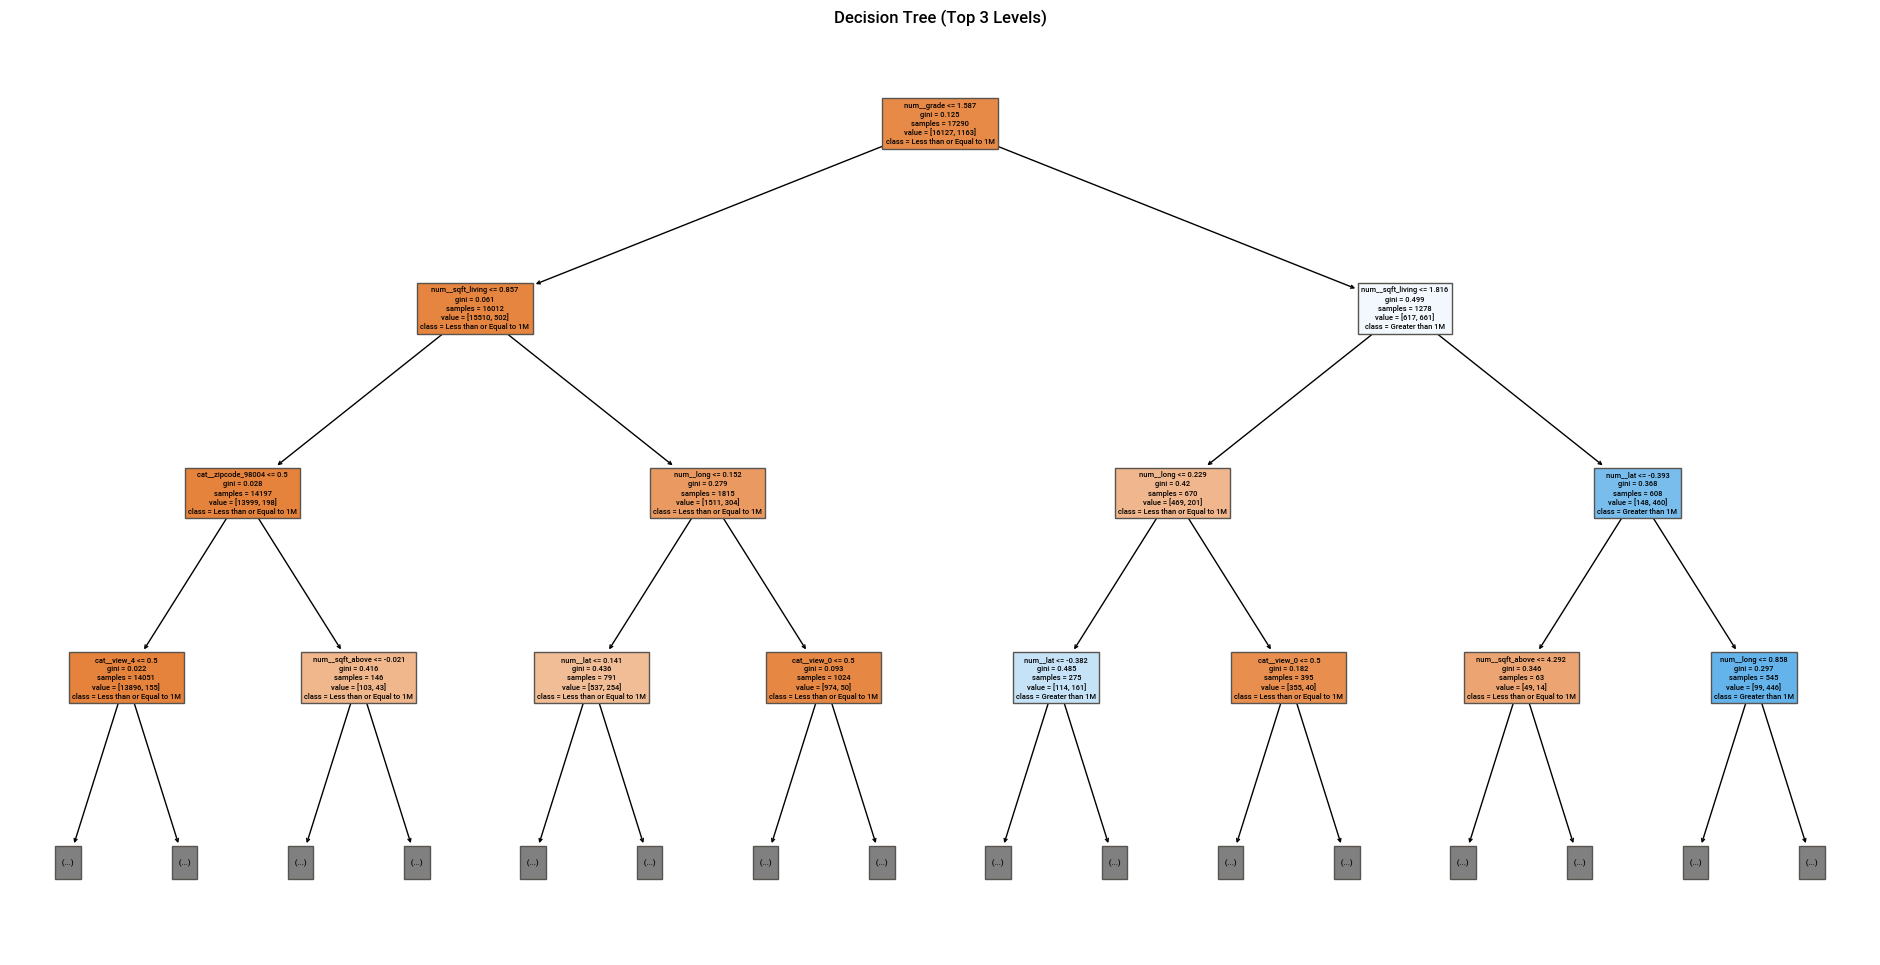

In [219]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the fitted tree inside the pipeline
fitted_tree = tree_model.named_steps['tree']

# Plot tree (limit depth for readability)
plt.figure(figsize = (24, 12))
plot_tree(
    fitted_tree,
    max_depth = 3,  
    filled=True,
    feature_names = tree_model.named_steps['preprocessor'].get_feature_names_out().tolist() ,
    class_names = ['Less than or Equal to 1M', 'Greater than 1M']
)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()


<h5 align = "center">  Task 7 </h5>

In [222]:
# Load the regression dataset that includes actual price values

regression_df = pd.read_csv('data/kc_house_data_regression.csv')
regression_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,510000.0


In [228]:
# Get the original row indices of X_test

X_test_index = X_test.index

In [230]:

# Filter price values only for test set using index
test_prices = regression_df.loc[X_test_index, 'price']

In [232]:
# Generate predictions using Lasso model
y_pred = lasso_model.predict(X_test)

In [234]:
# Compare predicted vs actual labels to get errors
error_mask = y_pred != y_test.values  

In [236]:
# Get prices where prediction was wrong
incorrect_prices = test_prices.loc[error_mask]

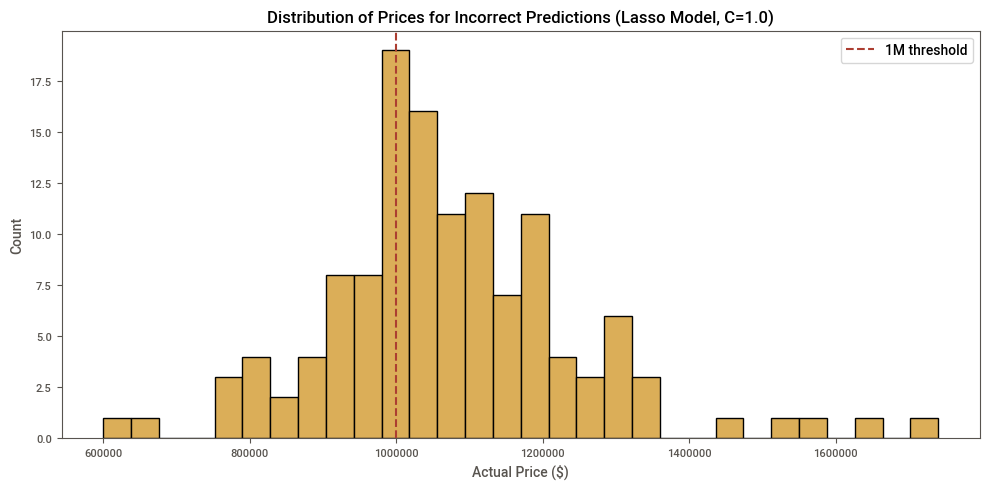

In [242]:
import matplotlib.pyplot as plt

# Plot histogram of incorrectly predicted house prices
plt.figure(figsize = (10, 5))
plt.hist(incorrect_prices, bins = 30, color = '#DBAE58', edgecolor = 'black')
plt.axvline(x = 1000000, color = '#AC3E31', linestyle = '--', label = '1M threshold')
plt.title('Distribution of Prices for Incorrect Predictions (Lasso Model, C=1.0)')
plt.xlabel('Actual Price ($)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


<h5>  The histogram shows the actual sale prices of homes that were incorrectly classified by the Lasso model (C = 1.0). Most of the errors cluster around the 1 million threshold, highlighted by the dashed line. This suggests that the model struggles most when prices are close to the decision boundary, it's harder to correctly label homes just slightly above or below $1M. The farther a home’s price is from 1M, model tends to make fewer errors. </h5>